In [1]:
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("plant_disease_dataset.csv")
df

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
...,...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0


In [4]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [5]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


In [6]:
df.isna().sum()

temperature        0
humidity           0
rainfall           0
soil_pH            0
disease_present    0
dtype: int64

In [7]:
df.dtypes

temperature        float64
humidity           float64
rainfall           float64
soil_pH            float64
disease_present      int64
dtype: object

<Axes: xlabel='humidity'>

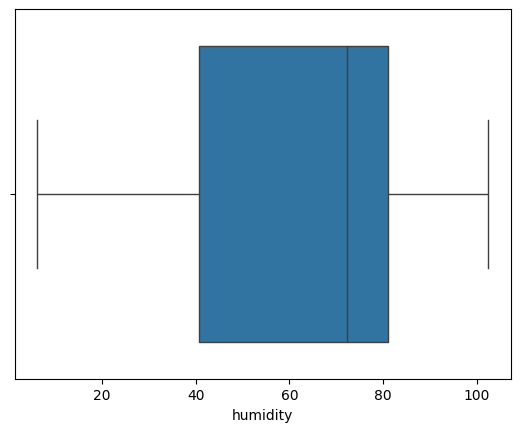

In [8]:
sns.boxplot(x = df["humidity"],data =df)

In [9]:
# col =  df.columns

# for c in col:
#     plt.figure(figsize = (10,6))
#     sns.boxplot(x = df,data = df)
    

In [10]:
df_corr = df.corr()
df_corr

,temperature,humidity,rainfall,soil_pH,disease_present
temperature,1.000000,-0.010136,-0.018284,-0.016792,-0.000869
humidity,-0.010136,1.000000,0.011850,0.008483,0.199241
rainfall,-0.018284,0.011850,1.000000,0.006270,0.218602
soil_pH,-0.016792,0.008483,0.006270,1.000000,-0.074088
disease_present,-0.000869,0.199241,0.218602,-0.074088,1.000000


<Axes: >

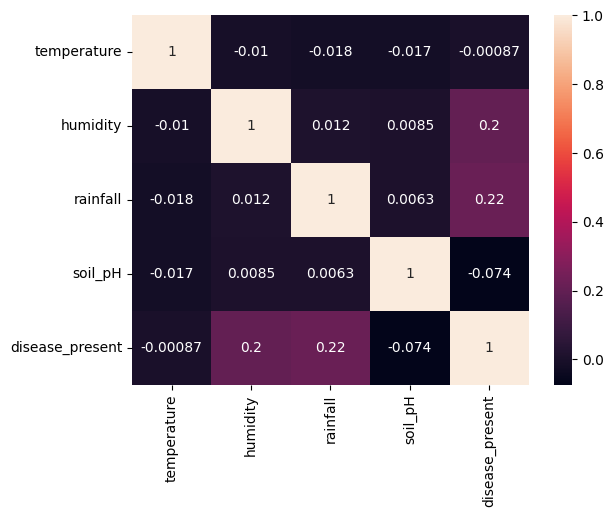

In [11]:
sns.heatmap(df_corr,annot = True)

In [12]:
X =  df.drop("disease_present",axis = 1)
y =  df["disease_present"]

In [13]:
X

,temperature,humidity,rainfall,soil_pH
0,27.483571,33.215053,0.572758,4.975875
1,24.308678,36.945005,42.522346,8.165266
2,28.238443,34.026189,16.095303,6.316734
3,32.615149,41.104180,20.311015,6.164949
4,23.829233,51.971785,11.851323,8.482468
...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952
9996,15.008275,86.886833,10.503881,4.070539
9997,21.473416,81.891770,13.426869,7.101583
9998,27.478828,88.567649,9.719659,7.732620


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10)

In [18]:
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], shape=(2000,))

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

score = accuracy_score(y_test,y_pred)
matrix  =  confusion_matrix(y_test,y_pred)
print("the accuracy is:",score)
print("the confusion matrix:",matrix)

the accuracy is: 0.8485
the confusion matrix: [[1407  111]
 [ 192  290]]


In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


In [23]:
import pickle

In [24]:
with open('plant_disease_detection_model.pkl','wb')as f:
    pickle.dump(model, f)

In [25]:
%pip install -r requirements.txt



  Using cached streamlit-1.47.0-py3-none-any.whl.metadata (9.0 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 0.55.2 Requires-Python <3.5
ERROR: Could not find a version that satisfies the requirement matplolib (from versions: none)
ERROR: No matching distribution found for matplolib
